In [ ]:
%pip install numpy
%pip install matplotlib
%pip install pandas

In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [ ]:
# Defining the 8 u120 instances
problems = [
  
  {
    "name": "u120_00",
    "capacity": 150,
    "best": 48,
    "items": [42,69,67,57,93,90,38,36,45,42,33,79,27,57,44,84,86,92,46,38,85,33,82,73,49,70,59,23,57,72,74,69,33,42,28,46,30,64,29,74,41,49,55,98,80,32,25,38,82,30,35,39,57,84,62,50,55,27,30,36,20,78,47,26,45,41,58,98,91,96,73,84,37,93,91,43,73,85,81,79,71,80,76,83,41,78,70,23,42,87,43,84,60,55,49,78,73,62,36,44,94,69,32,96,70,84,58,78,25,80,58,66,83,24,98,60,42,43,43,39]
  },
  {
    "name": "u120_01",
    "capacity": 150,
    "best": 49,
    "items": [97,57,81,62,75,81,23,43,50,38,60,58,70,88,36,90,37,45,45,39,44,53,70,24,82,81,47,97,35,65,74,68,49,55,52,94,95,29,99,20,22,25,49,46,98,59,98,60,23,72,33,98,80,95,78,57,67,53,47,53,36,38,92,30,80,32,97,39,80,72,55,41,60,67,53,65,95,20,66,78,98,47,100,85,53,53,67,27,22,61,43,52,76,64,61,29,30,46,79,66,27,79,98,90,22,75,57,67,36,70,99,48,43,45,71,100,88,48,27,39]
  },
  {
    "name": "u120_02",
    "capacity": 150,
    "best": 46,
    "items": [38,100,60,42,20,69,24,23,92,32,84,36,65,84,34,68,64,33,69,27,47,21,85,88,59,61,50,53,37,75,64,84,74,57,83,28,31,97,61,36,46,37,96,80,53,51,68,90,64,81,66,67,80,37,92,67,64,31,94,45,80,28,76,29,64,38,48,40,29,44,81,35,51,48,67,24,46,38,76,22,30,67,45,41,29,41,79,21,25,90,62,34,73,50,79,66,59,42,90,79,70,66,80,35,62,98,97,37,32,75,91,91,48,26,23,32,100,46,29,26]
  },
  {
    "name": "u120_03",
    "capacity": 150,
    "best": 49,
    "items": [29,26,83,82,92,95,87,63,57,100,63,65,81,46,42,95,90,80,53,27,84,40,22,97,20,73,63,95,46,42,47,40,26,88,49,24,92,87,68,95,34,82,84,43,54,73,66,32,62,48,99,90,86,28,25,25,89,67,96,35,33,70,40,59,32,94,34,86,35,45,25,76,80,42,91,44,91,97,60,29,45,37,61,54,78,56,74,74,45,21,96,37,75,100,58,84,85,56,54,71,52,79,43,35,27,70,31,47,35,26,30,97,90,80,58,60,73,46,71,39]
  },
  {
    "name": "u120_04",
    "capacity": 150,
    "best": 50,
    "items": [42,98,27,21,71,71,78,76,57,24,91,84,35,25,77,96,97,89,30,86,81,39,75,66,85,36,60,56,50,75,75,37,87,95,21,99,42,57,31,37,42,40,69,91,45,97,84,90,52,43,68,53,37,65,79,73,92,87,20,20,73,42,52,20,24,76,71,72,21,21,82,92,78,87,50,41,31,73,89,59,88,40,71,69,45,57,49,68,84,32,69,77,92,98,57,39,32,23,99,91,48,21,70,43,73,69,65,57,67,28,84,42,61,92,82,34,74,55,60,69]
  },
  {
    "name": "u120_05",
    "capacity": 150,
    "best": 48,
    "items": [26,25,67,77,67,79,47,84,50,21,87,83,44,88,78,53,78,37,47,52,32,88,85,82,55,41,60,66,78,72,34,64,20,60,100,62,80,34,68,38,32,32,37,82,98,90,58,97,56,34,70,39,56,69,36,20,99,84,53,27,88,53,42,45,42,31,54,60,55,27,36,31,39,91,45,97,26,80,41,56,70,97,48,87,23,32,75,100,97,51,78,78,21,72,72,79,46,30,48,27,95,48,67,58,46,92,21,82,91,40,56,24,94,44,91,92,81,24,84,44]
  },
  {
    "name": "u120_06",
    "capacity": 150,
    "best": 48,
    "items": [83,37,98,85,88,95,29,35,100,55,48,27,20,66,62,52,88,59,97,91,81,81,86,48,43,60,72,88,90,48,38,60,53,55,90,48,55,57,59,25,51,22,43,31,52,89,96,58,63,27,46,43,30,44,71,66,64,28,83,88,42,92,95,36,24,62,44,82,59,31,96,44,61,78,72,62,76,65,22,41,27,85,80,72,100,29,27,43,83,32,33,53,95,99,20,23,72,50,50,27,89,53,75,81,34,27,69,48,84,37,69,54,51,49,49,54,100,55,45,83]
  },
  {
    "name": "u120_07",
    "capacity": 150,
    "best": 49,
    "items": [61,96,91,37,53,76,50,66,70,87,92,35,53,95,47,56,55,86,32,99,83,88,41,63,77,60,66,53,79,81,96,34,99,47,74,87,44,77,52,99,69,64,94,38,69,61,98,40,84,89,49,64,53,41,34,85,35,55,61,68,100,75,98,36,44,57,24,60,45,48,60,94,71,70,64,62,93,20,69,37,63,61,26,54,89,46,54,50,32,71,62,40,26,59,62,27,60,50,74,34,40,70,56,23,66,57,43,45,65,25,82,82,37,66,47,44,94,23,24,51]
  }
]

with open("binpack_u120.json", "w") as f:
    json.dump(problems, f, indent=2)




In [ ]:
class AntColony:
   def __init__(self, sizes, capacity, n_ants, n_best, n_iterations, decay, alpha, beta, ph_depo, R_max, temperature, shuffle_prob):

    self.sizes = sizes
    self.capacity = capacity
    self.n = len(sizes)

    self.n_ants = n_ants
    self.n_best = n_best
    self.n_iterations = n_iterations
    self.decay = decay
    self.alpha = alpha
    self.beta = beta
    self.ph_depo = ph_depo
    self.R_max = R_max

    # Pheromone per rank 
    self.pheromone = np.ones(R_max + 1)

    # Temperatur for softmax exploration
    self.temperature = temperature

    self.shuffle_prob = shuffle_prob

    # --- Helper functions ---

   def heuristic(self, residual):
      # Chooses the bin with the smallest leftover space
      return 1.0 / (1.0 + residual)

   def choice_probabilities(self, feasible_bins, new_residual):
      # Compute seleciton probability for each bin (existing bin + new bin)
      options = []

      #Existing bins
      for rank, residual in feasible_bins:
        limited_rank = min(rank, self.R_max)
        pheromone_strength = self.pheromone[limited_rank] ** self.alpha
        heuristic_value = self.heuristic(residual) ** self.beta
        options.append((limited_rank, pheromone_strength * heuristic_value))

      #New bin
      pheromone_new = self.pheromone[0] ** self.alpha
      heuristic_new = self.heuristic(new_residual) ** self.beta
      options.append((0, pheromone_new * heuristic_new))

      # convert to numpy array for temperatur scaling
      ranks, scores = zip(*options)
      scores = np.array(scores)

      probs = scores ** (1 / self.temperature)
      probs /= probs.sum()
      return list(zip(ranks, probs))


   def sample_rank(self, probabilities):
      # Randomly choose a rank based on its probability
      random_value = np.random.random()
      running_total = 0.0
      for rank, prob in probabilities:
        running_total += prob
        if random_value <= running_total:
          return rank
      return probabilities[-1][0]

   # --- Construct one solution ---

   def construct_solution(self):
      bins = [] # each bin holds item indices
      loads = [] # total load of each bin
      ranks_used = [] # track ranks chosen for later phermonoes update

      order=list(range(self.n))
      if np.random.random() < self.shuffle_prob:
        np.random.shuffle(order)
      else:
        order.sort(key=lambda i: -self.sizes[i])

      for item in order:
        item_size = self.sizes[item]

        # find bins where the item fits
        feasible = []
        for bin_index in range(len(loads)):
          if loads[bin_index] + item_size <= self.capacity:
            residual_after = self.capacity - (loads[bin_index] + item_size)
            feasible.append((bin_index, residual_after))
        feasible_ranked = [(i + 1, res) for i, (_, res) in enumerate(sorted(feasible,  key=lambda x: x[1]))]

        # calculate probabilities
        new_residual = self.capacity - item_size
        probabilities = self.choice_probabilities(feasible_ranked, new_residual)
        chosen_rank = self.sample_rank(probabilities)
        ranks_used.append(chosen_rank)

        # place the item
        if chosen_rank == 0:
           bins.append([item])
           loads.append(item_size)
        else:
          index = min(chosen_rank - 1, len(feasible) - 1)
          bin_index = feasible[index][0]
          bins[bin_index].append(item)
          loads[bin_index] += item_size

      num_bins = len(bins)
      total_unused = num_bins * self.capacity - sum(loads)
      return bins, loads, ranks_used, num_bins, total_unused

   def run(self):
    best_solution = None
    best_bins = float("inf")
    best_progress = []

    for iteration in range(self.n_iterations):
      all_solutions = []
      for _ in range(self.n_ants):
        bins, loads, ranks_used, num_bins, total_unused = self.construct_solution()
        all_solutions.append((bins, loads, ranks_used, num_bins, total_unused))

      # Sort by number of bins used and unused space
      all_solutions.sort(key=lambda x: (x[3], x[4]))

      # Evaporate pheromone
      self.pheromone *= self.decay

      # Update pheromone for the n_best solutions
      for i in range(self.n_best):
        bins, loads, ranks_used, num_bins, total_unused = all_solutions[i]
        for r in ranks_used:
          self.pheromone[r] += self.ph_depo / num_bins

      # track the best
      best_iteration = all_solutions[0]
      if best_iteration[3] < best_bins:
        best_bins = best_iteration[3]
        best_solution = best_iteration
      best_progress.append(best_bins)

      print(f"Iteration {iteration+1}/{self.n_iterations} -> Best bins: {best_bins}")

    print("\nBest overall solution used", best_bins, "bins")
    bins, loads, _, _, _ = best_solution
    for i, (b, load) in enumerate(zip(bins, loads)):
      print(f" Bin {i}: load={load}, items={[self.sizes[j] for j in b]}")

    return  best_solution, best_progress

# --- Load JSON dataset ---

with open("binpack_u120.json", "r") as f:
    problems = json.load(f)

results = []

for prob in problems:
    print(f"\n Running instance: {prob['name']}")
    sizes = prob["items"]
    capacity = prob["capacity"]
    best_known = prob["best"]

    start_time = time.time()

    ant_colony = AntColony(
        sizes, capacity,
        n_ants=50,
        n_best=5,
        n_iterations=200,
        decay=1,
        alpha=3,
        beta=1,
        ph_depo = 1,
        R_max=10,
        temperature=2.0,
        shuffle_prob=0.3
    )

    best_solution, progress = ant_colony.run()
    bins, loads, ranks_used, num_bins, total_unused = best_solution

    end_time = time.time()
    runtime = round(end_time - start_time, 3)

    plt.figure()
    plt.plot(range(1, len(progress) + 1), progress, marker='o')
    plt.xlabel("Iteration")
    plt.ylabel("Best bins")
    plt.title(f"Convergence - {prob['name']}")
    plt.grid(True)
    plt.show()

    plt.figure()
    plt.bar(range(len(loads)), loads, color='skyblue')
    plt.axhline(capacity, color='red', linestyle='--', label='Capacity')
    plt.xlabel("Bin index")
    plt.ylabel("Load")
    plt.title(f"Load Distribution - {prob['name']}")
    plt.legend()
    plt.show()

    # Save results for summary table
    results.append({
        "Instance": prob["name"],
        "Best Known": best_known,
        "ACO Bins": num_bins,
        "Unused Space": total_unused,
        "Runtime (s)": runtime
    })

# --- Display summary table ---

df = pd.DataFrame(results)
print("\n=== Summary Table ===")
print(df)

# Plot table using matplotlib
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')
table_data = df.values
column_labels = df.columns
ax.table(cellText=table_data, colLabels=column_labels, loc='center')
plt.title("ACO Bin Packing Results - u120 Instances")
plt.show()


# Optimizing Classic Benchmark Functions using Particle Swarm Optimization (PSO)

In [ ]:
#--- Import Dependencies ---#
import matplotlib.pyplot as plt
import numpy as np
import time
import os

In [ ]:
#--- Sphere function (minimize) ---#
def sphere(x):
    return np.sum(np.square(x))


#--- Rosenbrock function (minimize) ---#
def rosenbrock(x):
    total = 0
    for i in range(len(x) - 1):
        part1 = 100*(x[i+1] - x[i]**2)**2
        part2 = (1-x[i])**2
        total += (part1 + part2)

    return total


#--- Rastrigin function (minimize) ---#
def rastrigin(x):
    total = 10 * len(x) + np.sum(np.square(x) - 10 * np.cos(2 * np.pi * x))
    return total


#--- Ackley function (minimize) ---#
def ackley(x):
    n = len(x)
    part1 = -20*np.exp(-0.2*np.sqrt(1/n*np.sum(np.square(x))))
    part2 = -np.exp(1/n * np.sum(np.cos(2*np.pi*x)))
    return part1 + part2 + 20 + np.exp(1)

In [ ]:
#--- Main ---#
class Particle:
    def __init__(self, bounds):
        self.num_dimensions = len(bounds)
        self.bounds = bounds
        self.position_i = np.array([np.random.uniform(b[0], b[1]) for b in bounds])  # Current position
        range_size = [b[1] - b[0] for b in bounds]
        self.velocity_i = np.array([np.random.uniform(-0.2*r, 0.2*r) for r in range_size])  # Current velocity
        self.pos_best_i = np.copy(self.position_i)  # Best known position of this particle
        self.err_best_i = np.inf  # Best known fitness of this particle
        self.err_i = np.inf       # Current fitness


    def evaluate (self, costFunc):
        self.err_i = costFunc(self.position_i)
        if self.err_i < self.err_best_i:
            self.pos_best_i = np.copy(self.position_i)
            self.err_best_i = self.err_i


    def update_velocity(self, pos_best_g, inertia_weight=0.7, cognitive_coef=1.5, social_coef=1.5):
        r1 = np.random.random(self.num_dimensions)
        r2 = np.random.random(self.num_dimensions)
        inertia = inertia_weight * self.velocity_i

        cognitive = cognitive_coef * r1 * (self.pos_best_i - self.position_i)
        social = social_coef * r2 * (pos_best_g - self.position_i)
        self.velocity_i = inertia + cognitive + social

        v_max = np.array([0.5 * (b[1] - b[0]) for b in self.bounds])
        self.velocity_i = np.clip(self.velocity_i, -v_max, v_max)


    def update_position(self):
        for i in range(0, self.num_dimensions):
            self.position_i[i] += self.velocity_i[i]

            if self.position_i[i] > self.bounds[i][1]:
                self.position_i[i] = self.bounds[i][1]

            if self.position_i[i] < self.bounds[i][0]:
                self.position_i[i] = self.bounds[i][0]

In [ ]:
#--- PSO Loop ---#

class PSO():
    def __init__(self, costFunc, bounds, num_particles=30, max_iterations=300,
                 inertia_weight=0.7, cognitive_coef=1.5, social_coef=1.5, local=False):
        self.costFunc = costFunc
        self.bounds = bounds
        self.num_particles = num_particles
        self.max_iterations = max_iterations
        self.inertia_weight = inertia_weight
        self.cognitive_coef = cognitive_coef
        self.social_coef = social_coef
        self.err_best_g = np.inf
        self.pos_best_g = None
        self.local = local

    def run(self):
        swarm = [Particle(self.bounds) for _ in range(self.num_particles)]
        best_curve = []
        
        for iteration in range(self.max_iterations):
            for particle in swarm:
                particle.evaluate(self.costFunc)
                if particle.err_i < self.err_best_g:
                    self.pos_best_g = np.copy(particle.position_i)
                    self.err_best_g = particle.err_i
            
            best_curve.append(self.err_best_g)

            for idx, particle in enumerate(swarm):
                if self.local == True:
                    left = (idx - 2) % self.num_particles
                    right = (idx + 2) % self.num_particles
                    neighborhood = [swarm[left], swarm[idx], swarm[right]]
                    best_local_particle = min(neighborhood, key=lambda p: p.err_best_i)
                    pos_best_local = np.copy(best_local_particle.pos_best_i)

                    particle.update_velocity(pos_best_local, self.inertia_weight, self.cognitive_coef, self.social_coef)
                
                else:
                    particle.update_velocity(self.pos_best_g, self.inertia_weight, self.cognitive_coef, self.social_coef)
                
                particle.update_position()

            #--- Early stopping condition ---#
            func_name = self.costFunc.__name__.lower()
            if (func_name in ['sphere', 'rosenbrock'] and self.err_best_g < 1e-8) or \
                (func_name in ['rastrigin', 'ackley'] and self.err_best_g < 1e-4):
                #print(f"Stopping early at iteration {iteration} ({func_name})")
                break

            #if iteration == self.max_iterations - 1:
                #print("Maximum number of iterations reached")

        #print("Best position:", self.pos_best_g)
        #print("Best fitness:", self.err_best_g)
        evals = len(best_curve) * self.num_particles
        return self.pos_best_g, self.err_best_g, best_curve, evals



In [ ]:
def compare_functions(results, functions, dimensions, save=False):
    os.makedirs("plots", exist_ok=True)

    plt.figure(figsize=(7,5))
    for f in functions:
        curves = results[f]["curves"]
        max_len = max(len(c) for c in curves)
        padded = np.array([np.pad(c, (0, max_len - len(c)), 'edge') for c in curves])
        plt.plot(np.mean(padded, axis=0), label=f)
    plt.title("PSO Convergence Comparison")
    plt.xlabel("Iteration")
    plt.ylabel("Mean best fitness (log scale)")
    plt.yscale("log")
    plt.legend()
    plt.grid(True)

    if save:
        path = os.path.join("plots", f"pso_convergence_comparison_{dimensions}D.png")
        plt.savefig(path, dpi=300, bbox_inches="tight")
        print(f"Saved: {path}")
    plt.show()


def plot_final_fitness_boxplots(results, dimensions, output_dir="plots", save=False):
    """Boxplots of final best fitness across all runs for each benchmark function."""
    os.makedirs(output_dir, exist_ok=True)

    data = []
    labels = []
    for f in results.keys():
        finals = [curve[-1] for curve in results[f]["curves"]]
        data.append(finals)
        labels.append(f)

    plt.figure(figsize=(8, 5))
    plt.boxplot(data, labels=labels, showmeans=True)
    plt.yscale("log")
    plt.title(f"Final Fitness Across 30 Runs ({dimensions}-D)")
    plt.ylabel("Final Best Fitness (log scale)")
    plt.grid(True, alpha=0.6)

    if save:
        path = os.path.join(output_dir, f"final_fitness_boxplot_{dimensions}D.png")
        plt.savefig(path, dpi=300, bbox_inches="tight")
        print(f"Saved: {path}")

    plt.show()


def plot_convergence_summary(results, function_name):
    """Show single-run and mean convergence curves side by side."""
    curves = results[function_name]["curves"]
    max_len = max(len(c) for c in curves)

    # Pad shorter runs (for consistent array shape)
    padded = np.array([np.pad(c, (0, max_len - len(c)), 'edge') for c in curves])
    mean_curve = np.mean(padded, axis=0)
    std_curve = np.std(padded, axis=0)

    # Create side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # --- Left: Single run convergence ---
    axes[0].plot(curves[0])
    axes[0].set_title(f"Single Run – {function_name}")
    axes[0].set_xlabel("Iteration")
    axes[0].set_ylabel("Best fitness (gbest)")
    axes[0].set_yscale("log")
    axes[0].grid(True)

    # --- Right: Mean ± Std convergence ---
    axes[1].plot(mean_curve, label="Mean gbest")
    axes[1].fill_between(range(max_len),
                         mean_curve - std_curve,
                         mean_curve + std_curve,
                         color="gray", alpha=0.3, label="±1 Std Dev")
    axes[1].set_title(f"Mean Convergence – {function_name}")
    axes[1].set_xlabel("Iteration")
    axes[1].set_ylabel("Best fitness (gbest)")
    axes[1].set_yscale("log")
    axes[1].grid(True)
    axes[1].legend()

    plt.tight_layout()
    plt.show()



def parameter_study(functions, configs, num_dimensions=10, num_runs=30):
    results = {}

    for costFunc in functions:
        print(f"\nParameter Study – {costFunc.__name__} (n={num_dimensions})")
        if costFunc == rosenbrock:
            bounds = np.array([(-5, 10) for _ in range(num_dimensions)])
        elif costFunc == rastrigin:
            bounds = np.array([(-5.12, 5.12) for _ in range(num_dimensions)])
        elif costFunc == ackley:
            bounds = np.array([(-32.768, 32.768) for _ in range(num_dimensions)])
        else:
            bounds = np.array([(-5.12, 5.12) for _ in range(num_dimensions)])
        func_results = []

        for (omega, c1, c2) in configs:
            fitnesses = []
            for _ in range(num_runs):
                pso = PSO(costFunc, bounds, num_particles=30,
                          inertia_weight=omega, cognitive_coef=c1, social_coef=c2)
                _, best_fit, _, _ = pso.run()
                fitnesses.append(best_fit)

            # Record statistics for this parameter set
            func_results.append({
                "omega": omega,
                "c1": c1,
                "c2": c2,
                "mean": np.mean(fitnesses),
                "std": np.std(fitnesses),
                "best": np.min(fitnesses),
                "worst": np.max(fitnesses)
            })

            #print(f"(ω={omega}, c1={c1}, c2={c2}) → "
             #     f"mean={np.mean(fitnesses):.3e}, std={np.std(fitnesses):.3e}")

        # Store per-function results
        results[costFunc.__name__] = func_results

    return results


def plot_parameter_study(results, save=False, output_dir="plots"):
    """
    Visualize mean fitness across different (ω, c1, c2) settings
    for each benchmark function.
    """
    import os
    os.makedirs(output_dir, exist_ok=True)

    for func_name, configs in results.items():
        omegas = [r["omega"] for r in configs]
        means = [r["mean"] for r in configs]
        stds = [r["std"] for r in configs]
        labels = [f"ω={r['omega']}, c1={r['c1']}, c2={r['c2']}" for r in configs]

        plt.figure(figsize=(8, 5))
        plt.bar(range(len(configs)), means, yerr=stds, capsize=5, color='steelblue', alpha=0.8)
        plt.xticks(range(len(configs)), labels, rotation=25, ha='right')
        plt.yscale("log")
        plt.ylabel("Mean Final Fitness (log scale)")
        plt.title(f"Parameter Study Results – {func_name}")
        plt.grid(axis="y", alpha=0.4)

        if save:
            path = os.path.join(output_dir, f"param_study_{func_name}.png")
            plt.savefig(path, dpi=300, bbox_inches="tight")
            print(f"Saved: {path}")

        plt.show()




def compare_lbest_gbest(costFunc, bounds, num_particles=30, max_iterations=300,
                        inertia_weight=0.7, cognitive_coef=1.5, social_coef=1.5,
                        num_runs=10, output_dir="plots", save=False):
    """
    Compare convergence between local-best (lbest) and global-best (gbest) PSO.

    Parameters:
        costFunc: objective function
        bounds: np.array of variable bounds [(lower, upper), ...]
        num_particles: swarm size
        max_iterations: max iterations per run
        inertia_weight, cognitive_coef, social_coef: PSO parameters
        num_runs: number of independent runs for averaging
        output_dir: directory to save plots
        save: whether to save figure
    """

    os.makedirs(output_dir, exist_ok=True)
    print(f"Comparing lbest vs gbest on {costFunc.__name__}...")

    # --- Run global-best (standard PSO) ---
    from copy import deepcopy

    gbest_curves = []
    for _ in range(num_runs):
        pso_g = PSO(costFunc=costFunc, bounds=deepcopy(bounds),
                    num_particles=num_particles, max_iterations=max_iterations,
                    inertia_weight=inertia_weight, cognitive_coef=cognitive_coef,
                    social_coef=social_coef, local=False)
        _, _, curve_g, _ = pso_g.run()
        gbest_curves.append(curve_g)

    # --- Run local-best variant (ring topology) ---
    lbest_curves = []
    for _ in range(num_runs):
        pso_l = PSO(costFunc=costFunc, bounds=deepcopy(bounds),
                    num_particles=num_particles, max_iterations=max_iterations,
                    inertia_weight=inertia_weight, cognitive_coef=cognitive_coef,
                    social_coef=social_coef, local=True)
        _, _, curve_l, _ = pso_l.run()
        lbest_curves.append(curve_l)

    # --- Prepare curves (pad to equal length) ---
    max_len = max(max(len(c) for c in gbest_curves), max(len(c) for c in lbest_curves))
    pad = lambda c: np.pad(c, (0, max_len - len(c)), 'edge')
    gbest_curves = np.array([pad(c) for c in gbest_curves])
    lbest_curves = np.array([pad(c) for c in lbest_curves])

    gbest_mean, gbest_std = np.mean(gbest_curves, axis=0), np.std(gbest_curves, axis=0)
    lbest_mean, lbest_std = np.mean(lbest_curves, axis=0), np.std(lbest_curves, axis=0)

    # --- Plot ---
    plt.figure(figsize=(7, 5))
    plt.plot(gbest_mean, label="Global Best (gbest)", color="tab:blue")
    plt.fill_between(range(max_len), gbest_mean - gbest_std, gbest_mean + gbest_std,
                     color="tab:blue", alpha=0.2)
    plt.plot(lbest_mean, label="Local Best (lbest)", color="tab:orange")
    plt.fill_between(range(max_len), lbest_mean - lbest_std, lbest_mean + lbest_std,
                     color="tab:orange", alpha=0.2)

    plt.yscale("log")
    plt.xlabel("Iteration")
    plt.ylabel("Best fitness")
    plt.title(f"Global vs Local Best PSO Comparison – {costFunc.__name__}")
    plt.legend()
    plt.grid(True)

    if save:
        path = os.path.join(output_dir, f"gbest_vs_lbest_{costFunc.__name__}.png")
        plt.savefig(path, dpi=300, bbox_inches="tight")
        print(f"Saved: {path}")

    plt.show()


In [ ]:
def run_experimental(num_runs=30, num_dimensions=2, local=False):
    results = {}

    functions = [sphere, rosenbrock, rastrigin, ackley]

    for costFunc in functions:
        print(f"\nFunction: {costFunc.__name__}, Dimensions: {num_dimensions}, Runs: {num_runs}, Local: {local}")
        if costFunc == rosenbrock:
            bounds = np.array([(-5, 10) for _ in range(num_dimensions)])
        elif costFunc == rastrigin:
            bounds = np.array([(-5.12, 5.12) for _ in range(num_dimensions)])
        elif costFunc == ackley:
            bounds = np.array([(-32.768, 32.768) for _ in range(num_dimensions)])
        else:
            bounds = np.array([(-5.12, 5.12) for _ in range(num_dimensions)])

        fitnesses, all_curves, evaluations = [], [], []
        start_time = time.time()

        for _ in range(num_runs):
            n_particles = 50 if num_dimensions == 30 else 30
            pso = PSO(costFunc=costFunc, bounds=bounds, num_particles=n_particles, local=local)
            best_pos, best_fit, best_curve, evals = pso.run()
            fitnesses.append(best_fit)
            evaluations.append(evals)
            all_curves.append(best_curve)


        runtime = time.time() - start_time
        success_threshold = 1e-8 if costFunc in [sphere, rosenbrock] else 1e-4
        success_rate = np.mean(np.array(fitnesses) <= success_threshold)

        results[costFunc.__name__] = {
            "mean": np.mean(fitnesses),
            "median": np.median(fitnesses),
            "std": np.std(fitnesses),
            "best": np.min(fitnesses),
            "worst": np.max(fitnesses),
            "success_rate": success_rate,
            "mean_evaluations": np.mean(evaluations),
            "runtime_sec": runtime,
            "curves": all_curves,
            "fitnesses": fitnesses
        }

        print(f"→ mean: {np.mean(fitnesses):.3e}, std: {np.std(fitnesses):.3e}, "
              f"best: {np.min(fitnesses):.3e}, worst: {np.max(fitnesses):.3e}, "
              f"success_rate: {success_rate*100:.2f}, time: {runtime:.2f}s")

        plot_convergence_summary(results, costFunc.__name__)
        if costFunc == ackley:
            print("\n\n")

    return results

### Run the experiment


Function: sphere, Dimensions: 2, Runs: 30, Local: False
→ mean: 4.714e-09, std: 2.760e-09, best: 3.136e-10, worst: 9.935e-09, success_rate: 100.00, time: 0.66s


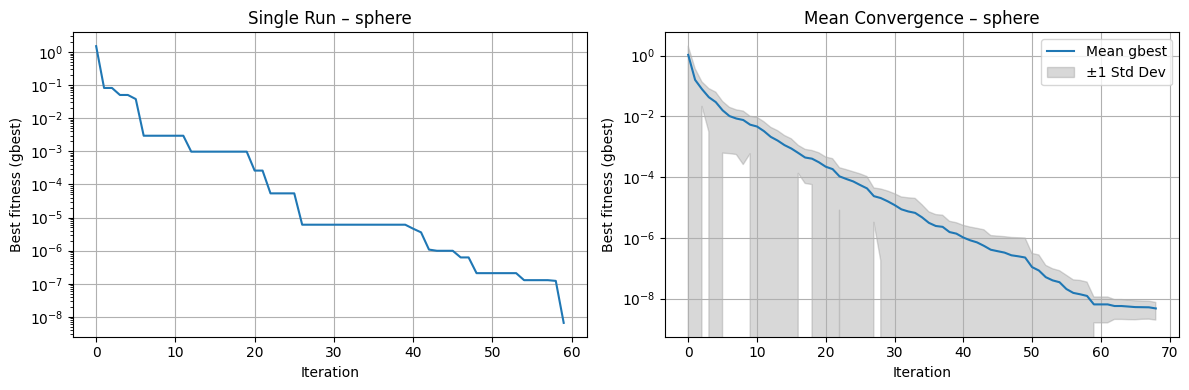


Function: rosenbrock, Dimensions: 2, Runs: 30, Local: False
→ mean: 5.649e-09, std: 3.167e-09, best: 2.844e-10, worst: 1.000e-08, success_rate: 100.00, time: 2.02s


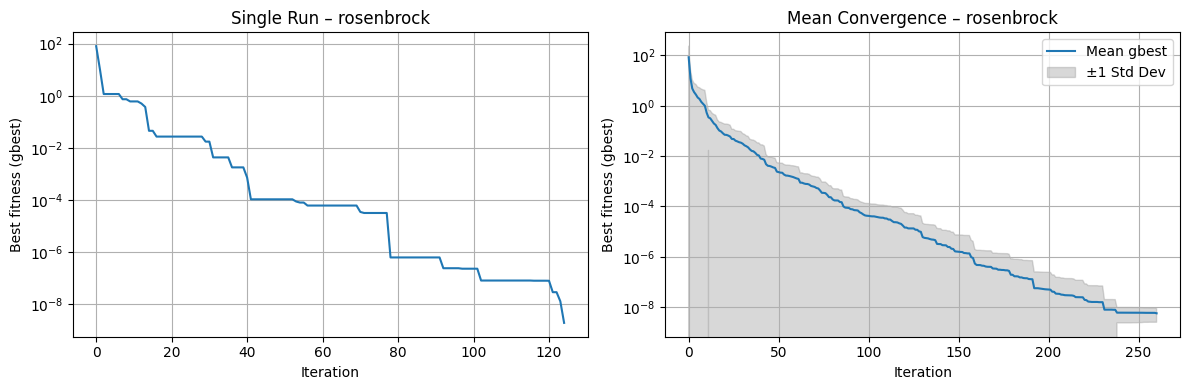


Function: rastrigin, Dimensions: 2, Runs: 30, Local: False
→ mean: 5.244e-05, std: 2.980e-05, best: 1.829e-06, worst: 9.976e-05, success_rate: 100.00, time: 0.68s


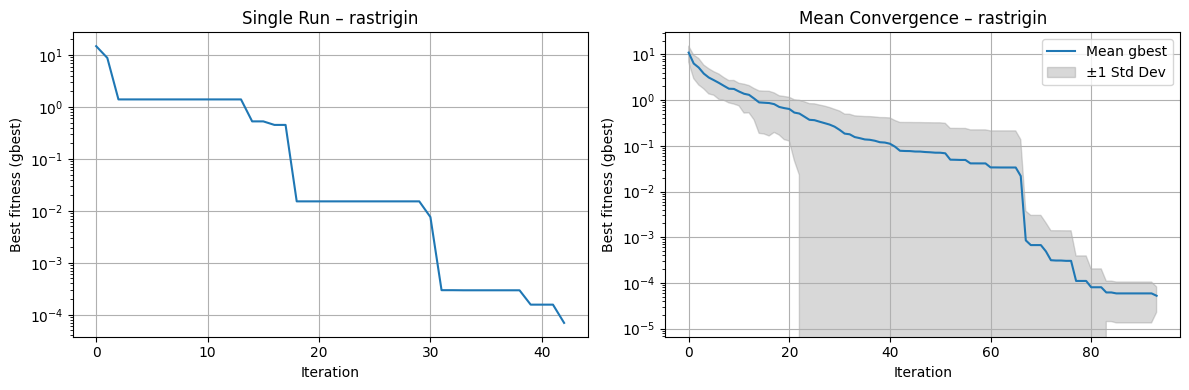


Function: ackley, Dimensions: 2, Runs: 30, Local: False
→ mean: 6.476e-05, std: 2.371e-05, best: 8.861e-06, worst: 9.633e-05, success_rate: 100.00, time: 1.08s


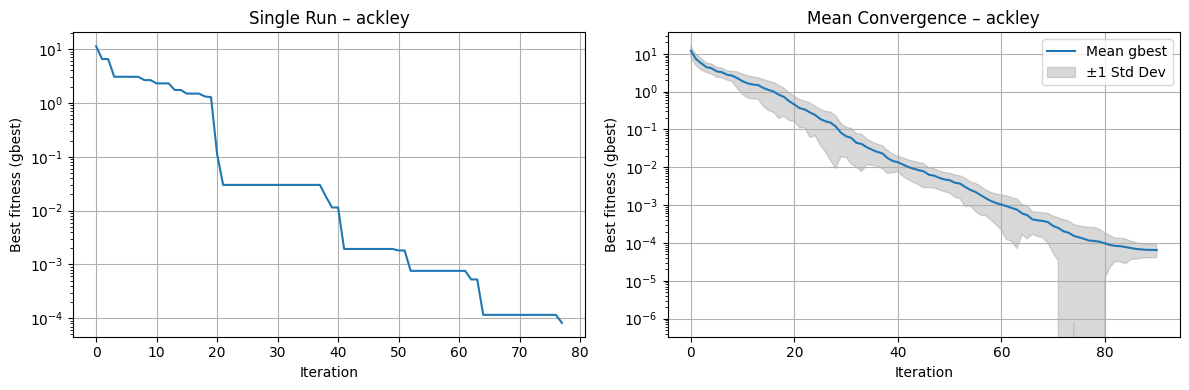

/var/folders/fn/nb_wvnys4vv2437k8n5w_9f80000gn/T/ipykernel_54276/3208322258.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showmeans=True)


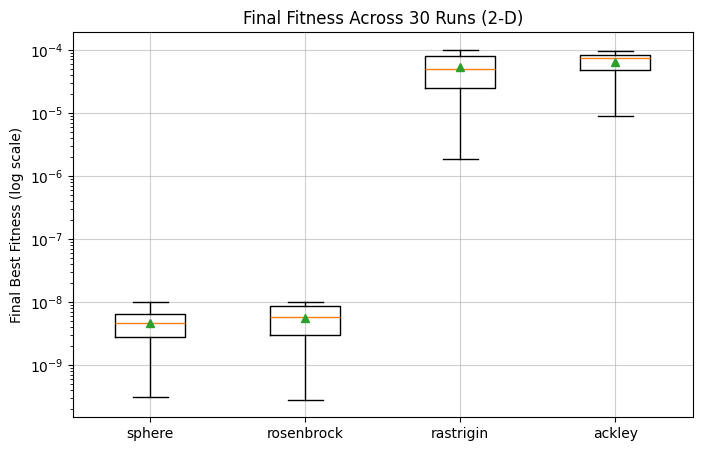

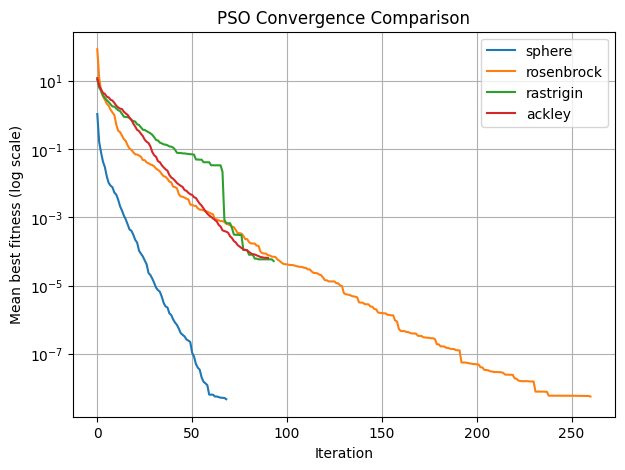





Function: sphere, Dimensions: 10, Runs: 30, Local: False
→ mean: 8.083e-09, std: 1.297e-09, best: 4.881e-09, worst: 9.945e-09, success_rate: 100.00, time: 2.26s


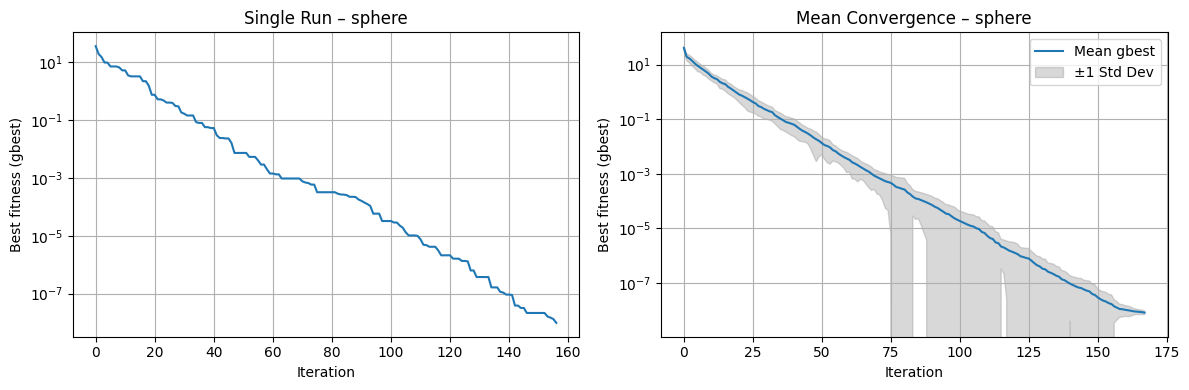


Function: rosenbrock, Dimensions: 10, Runs: 30, Local: False
→ mean: 9.627e+01, std: 4.490e+02, best: 5.474e-01, worst: 2.508e+03, success_rate: 0.00, time: 7.74s


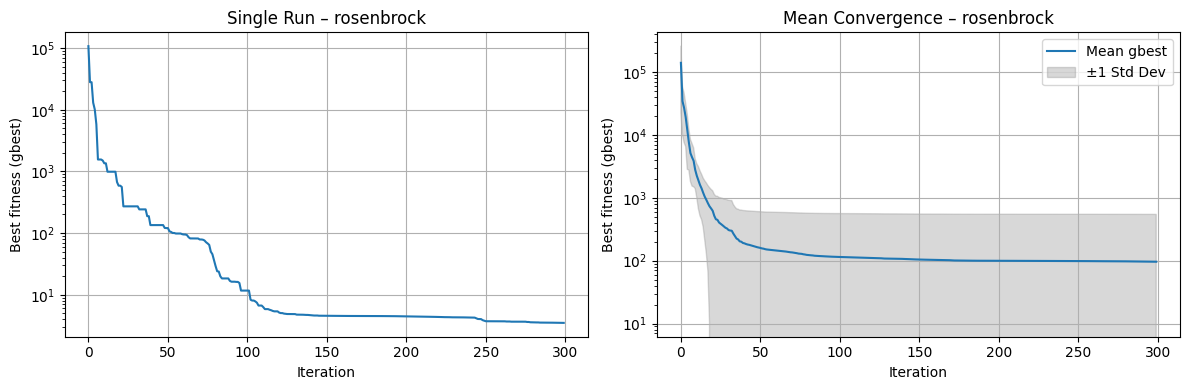


Function: rastrigin, Dimensions: 10, Runs: 30, Local: False
→ mean: 8.899e+00, std: 4.170e+00, best: 2.985e+00, worst: 1.890e+01, success_rate: 0.00, time: 5.05s


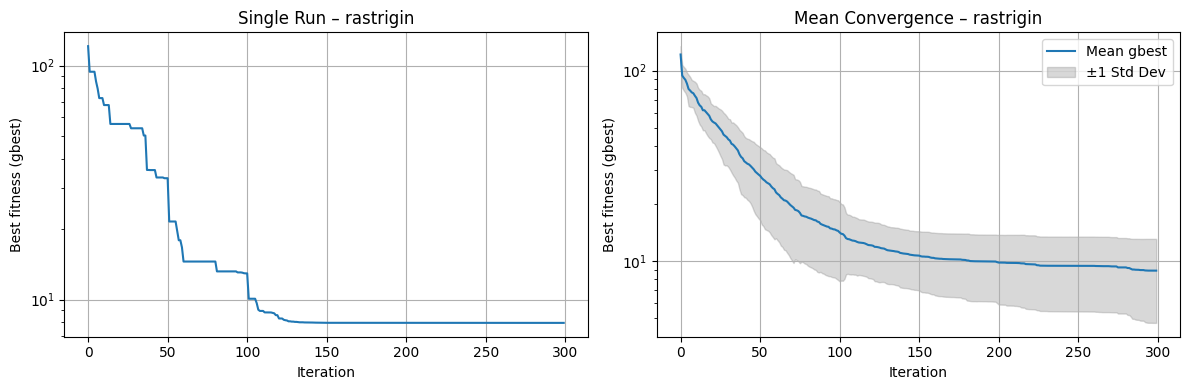


Function: ackley, Dimensions: 10, Runs: 30, Local: False
→ mean: 7.709e-02, std: 2.881e-01, best: 6.048e-05, worst: 1.155e+00, success_rate: 93.33, time: 3.72s


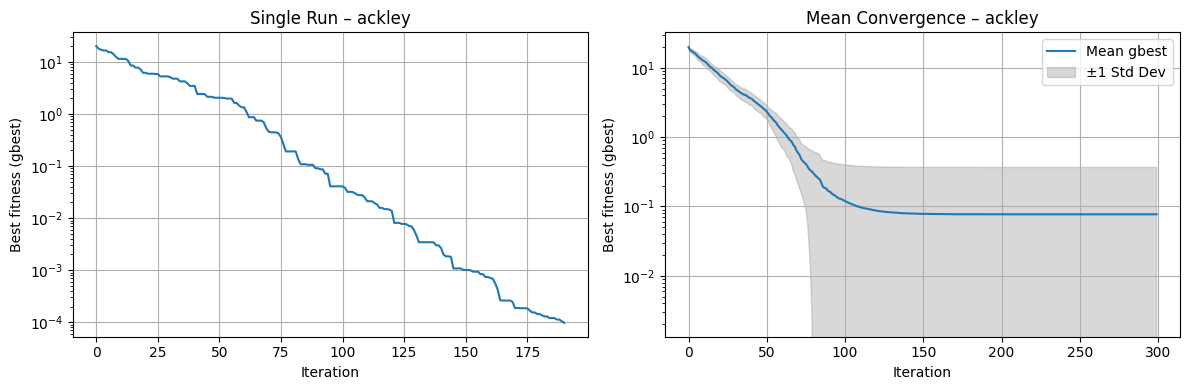

/var/folders/fn/nb_wvnys4vv2437k8n5w_9f80000gn/T/ipykernel_54276/3208322258.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showmeans=True)


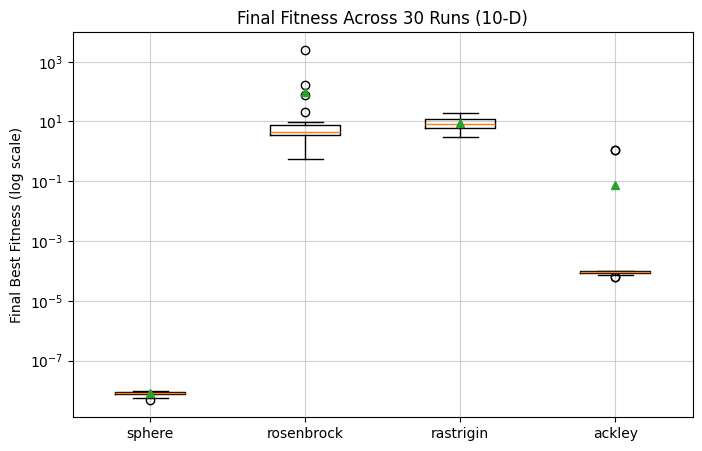

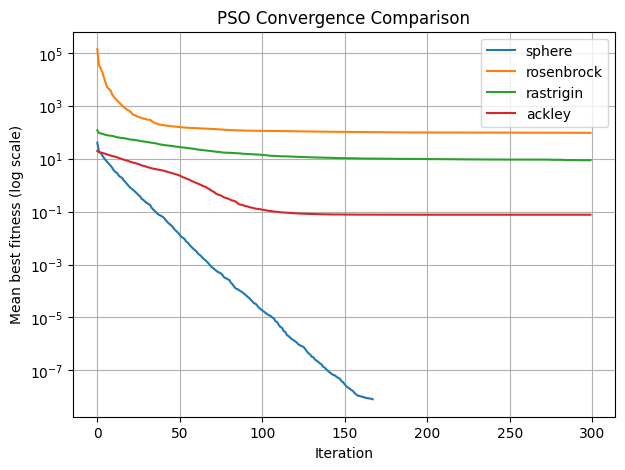





Function: sphere, Dimensions: 30, Runs: 30, Local: False
→ mean: 2.909e-06, std: 5.219e-06, best: 8.141e-08, worst: 2.823e-05, success_rate: 0.00, time: 13.72s


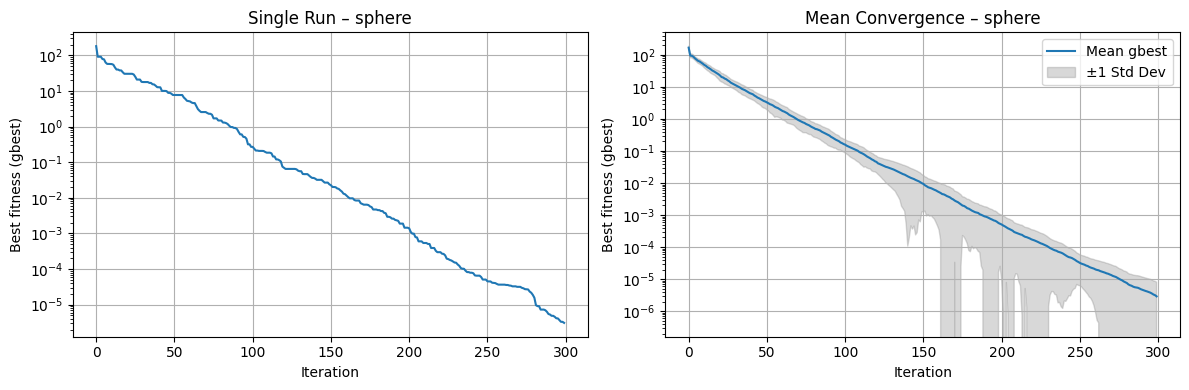


Function: rosenbrock, Dimensions: 30, Runs: 30, Local: False
→ mean: 2.022e+03, std: 9.918e+03, best: 1.429e+01, worst: 5.537e+04, success_rate: 0.00, time: 31.23s


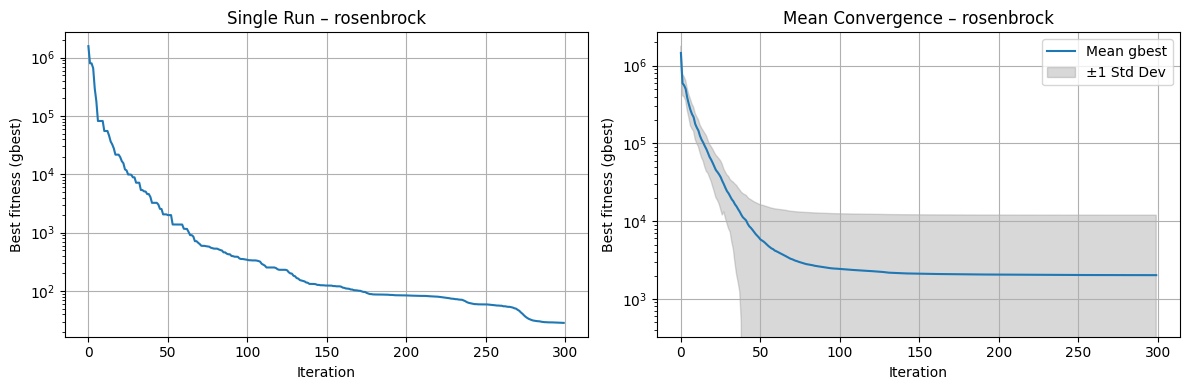


Function: rastrigin, Dimensions: 30, Runs: 30, Local: False
→ mean: 9.096e+01, std: 2.336e+01, best: 4.875e+01, worst: 1.573e+02, success_rate: 0.00, time: 14.45s


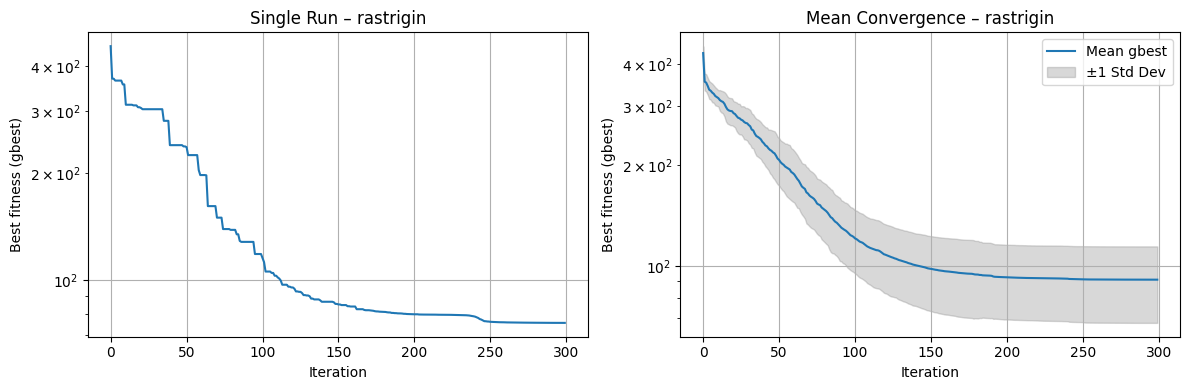


Function: ackley, Dimensions: 30, Runs: 30, Local: False
→ mean: 2.115e+00, std: 1.141e+00, best: 5.195e-03, worst: 6.131e+00, success_rate: 0.00, time: 16.24s


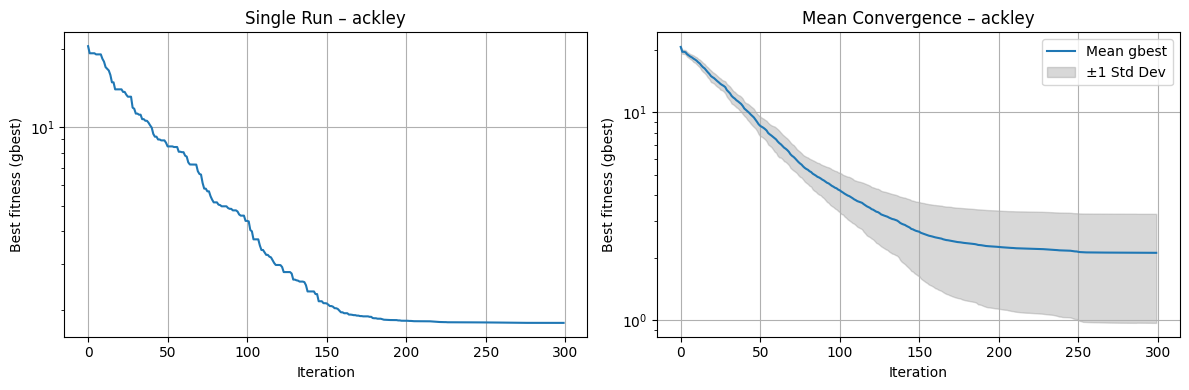

/var/folders/fn/nb_wvnys4vv2437k8n5w_9f80000gn/T/ipykernel_54276/3208322258.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showmeans=True)


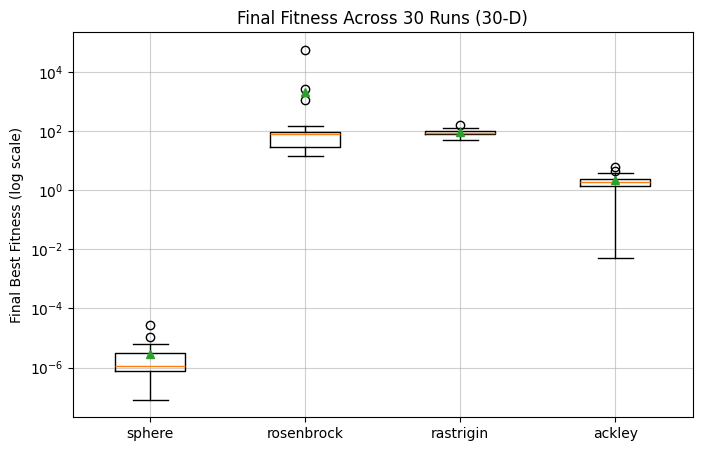

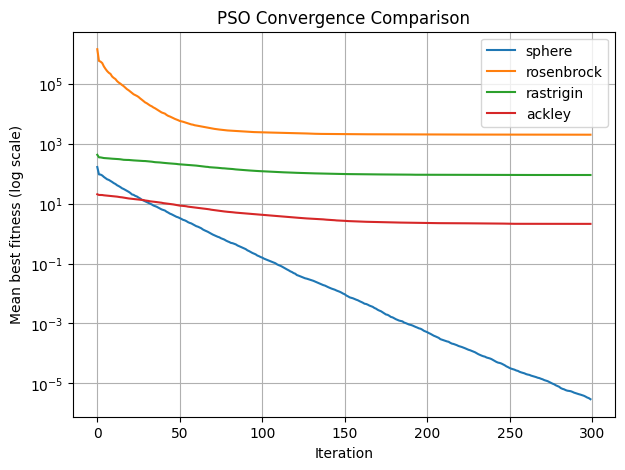

In [298]:
for num_dimensions in [2, 10, 30]:
  results = run_experimental(num_dimensions=num_dimensions, local=False)
  plot_final_fitness_boxplots(results, dimensions=num_dimensions)
  compare_functions(results, dimensions=num_dimensions,functions=["sphere", "rosenbrock", "rastrigin", "ackley"])
  print("\n\n")

### Compare local best & global best

Comparing lbest vs gbest on ackley...


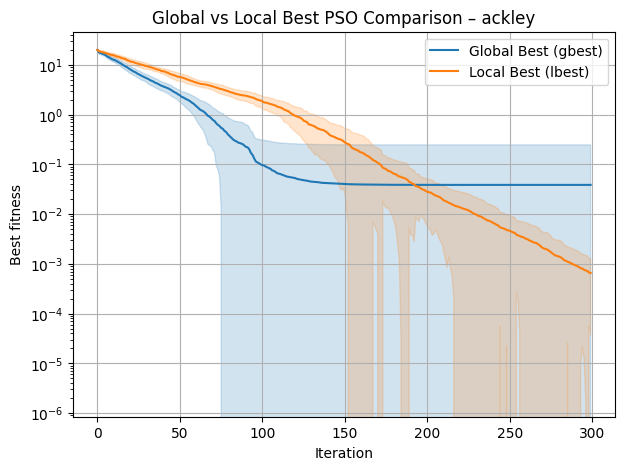

In [299]:
bounds = np.array([(-32.768, 32.768) for _ in range(10)])
compare_lbest_gbest(ackley, bounds, num_runs=30)

### Perform parameter study

In [300]:
np.random.seed(42)
num_dimensions = 10
bounds = [(-5.12, 5.12)]*num_dimensions
configs = [(0.7, 1.5, 1.5), (0.4, 2.0, 2.0), (0.9, 1.0, 1.0), (0.7, 2.0, 1.0), (0.7, 1.0, 2.0)]

param_results = parameter_study([sphere, rosenbrock, rastrigin, ackley], configs, num_dimensions)

for func_name, res in param_results.items():
    print(f"\n--- {func_name.upper()} ---")
    df = pd.DataFrame(res)
    print(df.to_string(index=False, float_format=lambda x: f"{x:.3e}"))


Parameter Study – sphere (n=10)

Parameter Study – rosenbrock (n=10)

Parameter Study – rastrigin (n=10)

Parameter Study – ackley (n=10)

--- SPHERE ---
    omega        c1        c2      mean       std      best     worst
7.000e-01 1.500e+00 1.500e+00 8.299e-09 1.531e-09 3.571e-09 9.990e-09
4.000e-01 2.000e+00 2.000e+00 8.381e-09 1.081e-09 5.917e-09 9.917e-09
9.000e-01 1.000e+00 1.000e+00 1.999e-04 1.436e-04 2.133e-05 5.230e-04
7.000e-01 2.000e+00 1.000e+00 7.748e-09 2.080e-09 2.573e-09 9.996e-09
7.000e-01 1.000e+00 2.000e+00 7.663e-09 1.840e-09 3.542e-09 9.980e-09

--- ROSENBROCK ---
    omega        c1        c2      mean       std      best     worst
7.000e-01 1.500e+00 1.500e+00 7.956e+00 2.004e+01 9.641e-03 1.152e+02
4.000e-01 2.000e+00 2.000e+00 1.247e+01 2.366e+01 4.571e-01 9.407e+01
9.000e-01 1.000e+00 1.000e+00 1.699e+02 4.988e+02 3.171e+00 2.506e+03
7.000e-01 2.000e+00 1.000e+00 6.824e+00 1.671e+01 5.604e-01 9.635e+01
7.000e-01 1.000e+00 2.000e+00 3.544e+02 8.452e+02 1.041

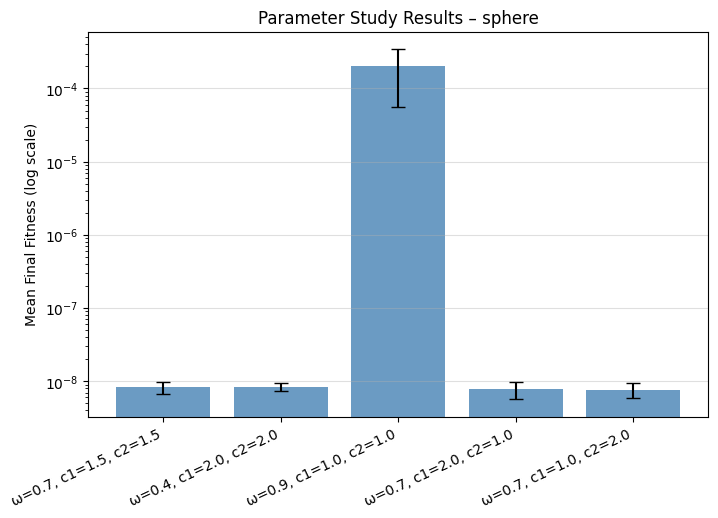

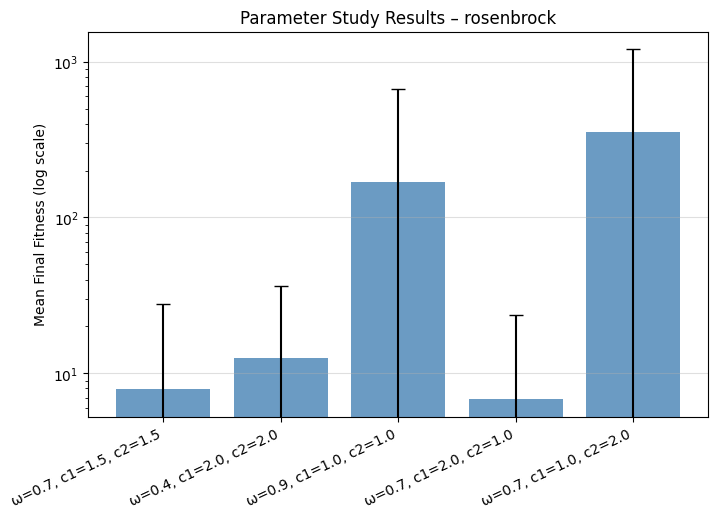

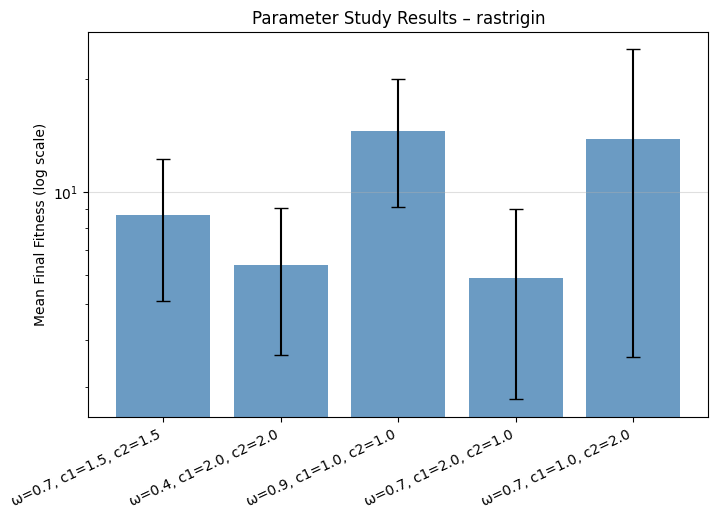

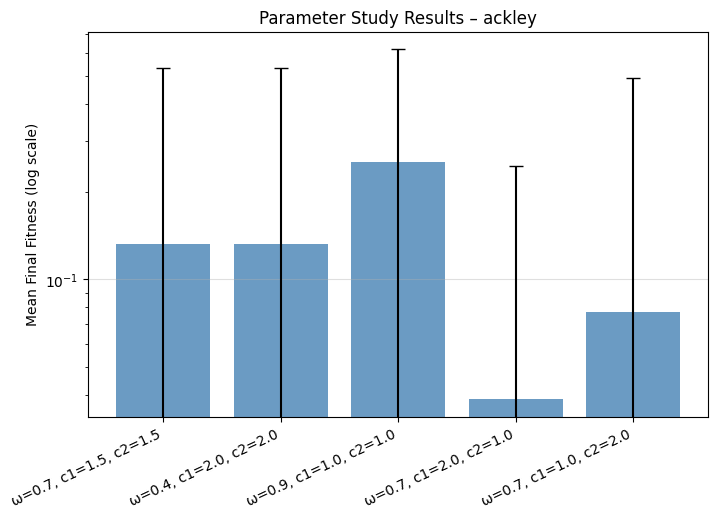

In [301]:
plot_parameter_study(param_results, output_dir="plots")